### All the libraries we need: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import matplotlib.dates as mdates


### Read Datasets

In [2]:
nac = pd.read_csv('Covid/nacional_covid19.csv')
test = pd.read_csv('Covid\ccaa_covid19_test_realizados.csv')
casos = pd.read_csv('Covid\ccaa_covid19_datos_isciii_nueva_serie.csv')

In [3]:
population = {   'Andalucía':8414240,
                 'Aragón':1319291,
                 'Principado de Asturias':1022800,
                 'Islas Baleares':1149460,
                 'Islas Canarias':2153389,
                 'Cantabria':581078,
                 'Castilla-La Mancha':2032863,
                 'Castilla y León':2399548,
                 'Cataluña':7675217,
                 'Ceuta y Melilla':171264,
                 'Comunidad Valenciana':5003769,
                 'Extremadura':1067710,
                 'Galicia':2699499,
                 'Comunidad de Madrid':6663394,
                 'Región de Murcia':1493898,
                 'Comunidad Foral de Navarra':654214,
                 'País Vasco':2207776,
                 'La Rioja':316798    
}

In [4]:
nac.head(5000)

,fecha,casos_total,casos_pcr,casos_test_ac,altas,fallecimientos,ingresos_uci,hospitalizados
0,2020-02-21,3.0,3,NaN,NaN,NaN,NaN,NaN
1,2020-02-22,3.0,3,NaN,NaN,NaN,NaN,NaN
2,2020-02-23,3.0,3,NaN,NaN,NaN,NaN,NaN
3,2020-02-24,3.0,3,NaN,NaN,NaN,NaN,NaN
4,2020-02-25,4.0,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
166,2020-08-19,NaN,370867,NaN,NaN,28797.0,12027.0,130478.0
167,2020-08-20,NaN,377906,NaN,NaN,28813.0,12045.0,130836.0
168,2020-08-21,NaN,386054,NaN,NaN,28838.0,12060.0,131175.0
169,2020-08-24,NaN,405436,NaN,NaN,28872.0,12098.0,131673.0


In [14]:
nac['fecha'] = pd.to_datetime(nac['fecha'])
nac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           171 non-null    datetime64[ns]
 1   casos_total     171 non-null    float64       
 2   casos_pcr       171 non-null    int64         
 3   casos_test_ac   171 non-null    float64       
 4   altas           171 non-null    float64       
 5   fallecimientos  171 non-null    float64       
 6   ingresos_uci    171 non-null    float64       
 7   hospitalizados  171 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 10.8 KB


### We clean our data: Non used columns in the axis 

In [6]:
test = test.drop(columns = ['Column','Column2','Column3','Column4','Column5','Column6','Column7'] )

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     360 non-null    object 
 1   cod_ine                   360 non-null    int64  
 2   CCAA                      360 non-null    object 
 3   PCR                       360 non-null    int64  
 4   PCR_x_1000hab.            360 non-null    object 
 5   TEST_ANTICUERPOS          360 non-null    int64  
 6   TEST_Acc_x_1000hab        360 non-null    object 
 7   OTROS_TESTS               360 non-null    float64
 8   OTROS_TESTS_x_1000hab.    360 non-null    object 
 9   TOTAL_PRUEBAS             360 non-null    int64  
 10  Total_Pruebas_x_1000hab.  360 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 22.6+ KB


### our date is an object type.  we want to convert it into datatype form: 

In [16]:
test['Fecha'] = pd.to_datetime(test['Fecha'])

test.head(50)

,Fecha,cod_ine,CCAA,PCR,PCR_x_1000hab.,TEST_ANTICUERPOS,TEST_Acc_x_1000hab,OTROS_TESTS,OTROS_TESTS_x_1000hab.,TOTAL_PRUEBAS,Total_Pruebas_x_1000hab.
0,2020-04-23,1,Andalucía,68862,"8,15",82757,"9,8",0.0,0,151619,"17,95"
1,2020-04-23,2,Aragón,19123,"14,44",3188,"2,41",0.0,0,22311,"16,85"
2,2020-04-23,3,Asturias,34425,"33,75",9502,"9,32",0.0,0,43927,"43,07"
3,2020-04-23,4,Illes Balears,27814,"23,21",4407,"3,68",0.0,0,32221,"26,88"
4,2020-04-23,5,Canarias,45052,"20,29",0,0,0.0,0,45052,"20,29"
5,2020-04-23,6,Cantabria,19560,"33,61",4533,"7,79",0.0,0,24093,"41,4"
6,2020-04-23,7,Castilla y León,65689,"27,34",44514,"18,53",0.0,0,110203,"45,86"
7,2020-04-23,8,Castilla-la Mancha,35895,"17,61",32611,16,0.0,0,68506,"33,61"
8,2020-04-23,9,Cataluña,194039,"25,5",2996,"0,39",0.0,0,197035,"25,89"
9,2020-04-23,10,Comunidad Valenciana,96406,"19,29",18098,"3,62",0.0,0,114504,"22,91"


### For clarity purposes, we will replace all NaN values for a 0. 

In [9]:
test = test.fillna(0)
nac = nac.fillna(0)

### Arreglem les dades del dataframe casos:    datetype + nova columna mesos

In [10]:
casos.head(5)

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,2020-01-31,1,Andalucía,0,0,0,0,0
1,2020-01-31,2,Aragón,0,0,0,0,0
2,2020-01-31,3,Asturias,0,0,0,0,0
3,2020-01-31,6,Cantabria,0,0,0,0,0
4,2020-01-31,18,Ceuta,0,0,0,0,0


In [11]:
casos['fecha'] = pd.to_datetime(casos['fecha'])

casos['mes'] = casos['fecha'].dt.month

In [12]:
nac.head()

,fecha,casos_total,casos_pcr,casos_test_ac,altas,fallecimientos,ingresos_uci,hospitalizados
0,2020-02-21,3.0,3,0.0,0.0,0.0,0.0,0.0
1,2020-02-22,3.0,3,0.0,0.0,0.0,0.0,0.0
2,2020-02-23,3.0,3,0.0,0.0,0.0,0.0,0.0
3,2020-02-24,3.0,3,0.0,0.0,0.0,0.0,0.0
4,2020-02-25,4.0,4,0.0,0.0,0.0,0.0,0.0


In [17]:
nac['Mes'] = nac['fecha'].dt.month

# hem creat una nova variable = mes.  servirà per realitzar visualitzacions de evolució

#### Actualitzem valors de casos_total

In [18]:
nac['casos_total'] = nac['casos_pcr'] + nac['casos_test_ac']

In [19]:
test.head()

,Fecha,cod_ine,CCAA,PCR,PCR_x_1000hab.,TEST_ANTICUERPOS,TEST_Acc_x_1000hab,OTROS_TESTS,OTROS_TESTS_x_1000hab.,TOTAL_PRUEBAS,Total_Pruebas_x_1000hab.
0,2020-04-23,1,Andalucía,68862,"8,15",82757,"9,8",0.0,0,151619,"17,95"
1,2020-04-23,2,Aragón,19123,"14,44",3188,"2,41",0.0,0,22311,"16,85"
2,2020-04-23,3,Asturias,34425,"33,75",9502,"9,32",0.0,0,43927,"43,07"
3,2020-04-23,4,Illes Balears,27814,"23,21",4407,"3,68",0.0,0,32221,"26,88"
4,2020-04-23,5,Canarias,45052,"20,29",0,0,0.0,0,45052,"20,29"


### Eliminem la resta de columnes innecessaries:  1 - tests: 

In [20]:
test = test.drop(columns = ['OTROS_TESTS', 'OTROS_TESTS_x_1000hab.'])

## TASK 1 = numero de casos x CCAA

In [21]:
casos_ccaa = casos.groupby('ccaa')['num_casos'].sum().reset_index()

casos_ccaa

,ccaa,num_casos
0,Andalucía,24774
1,Aragón,22869
2,Asturias,2917
3,Baleares,5219
4,C. Valenciana,21575
5,Canarias,4000
6,Cantabria,3168
7,Castilla La Mancha,24531
8,Castilla y León,30870
9,Cataluña,90217


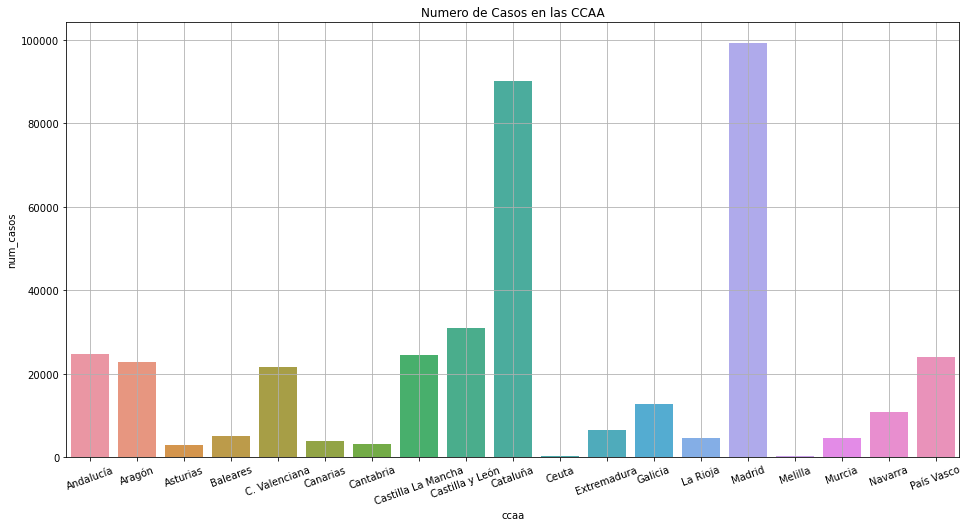

In [22]:
plt.figure(figsize=(16,8))


sns.barplot(data = casos_ccaa, x = 'ccaa', y = 'num_casos')

plt.xticks(rotation = 20)
plt.title('Numero de Casos en las CCAA')

plt.grid()
plt.show()

## Task 2: Evolució numero de casos x CCAA

In [23]:
casos_mes_ccaa = casos.groupby(['ccaa', 'mes'])['num_casos'].sum().reset_index()

casos_mes_ccaa



,ccaa,mes,num_casos
0,Andalucía,1,0
1,Andalucía,2,96
2,Andalucía,3,10594
3,Andalucía,4,5076
4,Andalucía,5,658
...,...,...,...
147,País Vasco,4,4222
148,País Vasco,5,491
149,País Vasco,6,296
150,País Vasco,7,2969


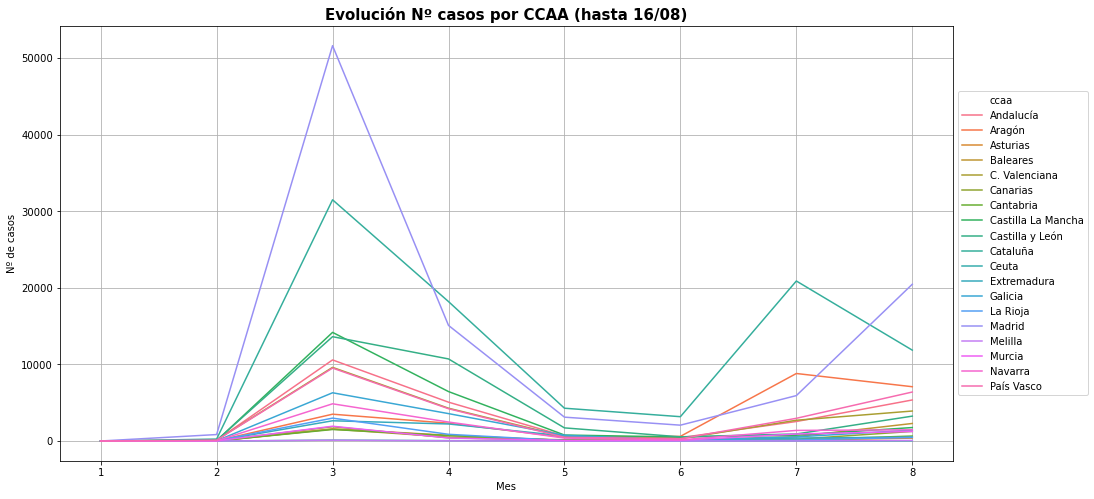

In [60]:
# Amb la nova variable de mesos, podem visualitzar la evolucio de casos x CCAA dividida en mesos. 

plt.figure(figsize=(16,8))
plt.title('Evolución Nº casos por CCAA (hasta 16/08)', fontdict = {'fontweight' : 'bold', 'fontsize' : 15})

ccaa = ['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'C. Valenciana',
       'Canarias', 'Cantabria', 'Castilla La Mancha', 'Castilla y León',
       'Cataluña', 'Ceuta', 'Extremadura', 'Galicia', 'La Rioja',
       'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País Vasco']


sns.lineplot(x = 'mes', y = 'num_casos', data = casos_mes_ccaa, hue = 'ccaa')


        

plt.grid()
plt.xlabel('Mes')
plt.ylabel('Nº de casos')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
    


    

### Task 2A:  Evolució Nº casos Madrid v.s Cataluña

In [24]:
casos_mes_ccaa

,ccaa,mes,num_casos
0,Andalucía,1,0
1,Andalucía,2,96
2,Andalucía,3,10594
3,Andalucía,4,5076
4,Andalucía,5,658
...,...,...,...
147,País Vasco,4,4222
148,País Vasco,5,491
149,País Vasco,6,296
150,País Vasco,7,2969


In [25]:
ca_to_compare = ['Cataluña', 'Madrid']

casos_mes_catmad = casos_mes_ccaa.loc[casos_mes_ccaa['ccaa'].isin(ca_to_compare)]


casos_mes_catmad


,ccaa,mes,num_casos
72,Cataluña,1,1
73,Cataluña,2,257
74,Cataluña,3,31508
75,Cataluña,4,18214
76,Cataluña,5,4286
77,Cataluña,6,3180
78,Cataluña,7,20901
79,Cataluña,8,11870
112,Madrid,1,4
113,Madrid,2,846


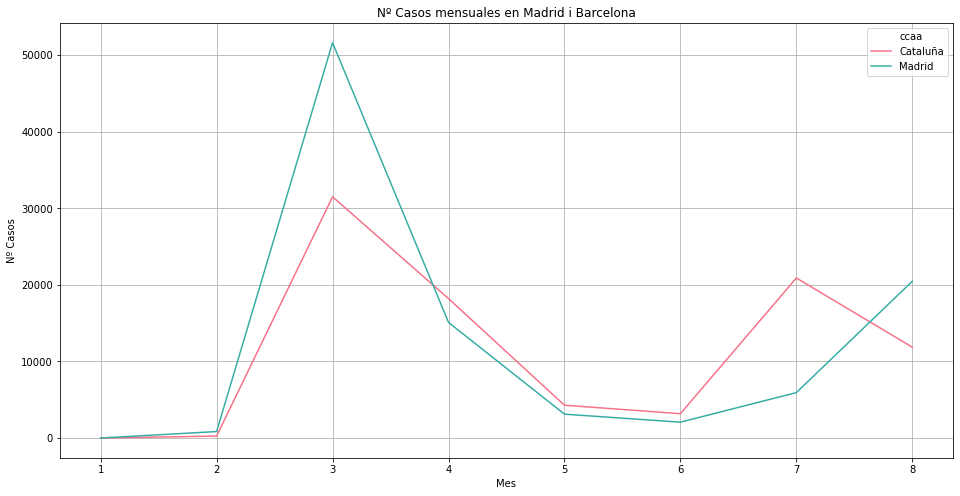

In [26]:
plt.figure(figsize =(16,8))

sns.lineplot(x= 'mes', y= 'num_casos', data = casos_mes_catmad, hue = 'ccaa', palette ='husl')

plt.title('Nº Casos mensuales en Madrid i Barcelona')
plt.ylabel('Nº Casos')
plt.xlabel('Mes')


plt.grid()
plt.show()



## TASK 2: Evolució casos totals per mes a España

In [ ]:
nac.head()

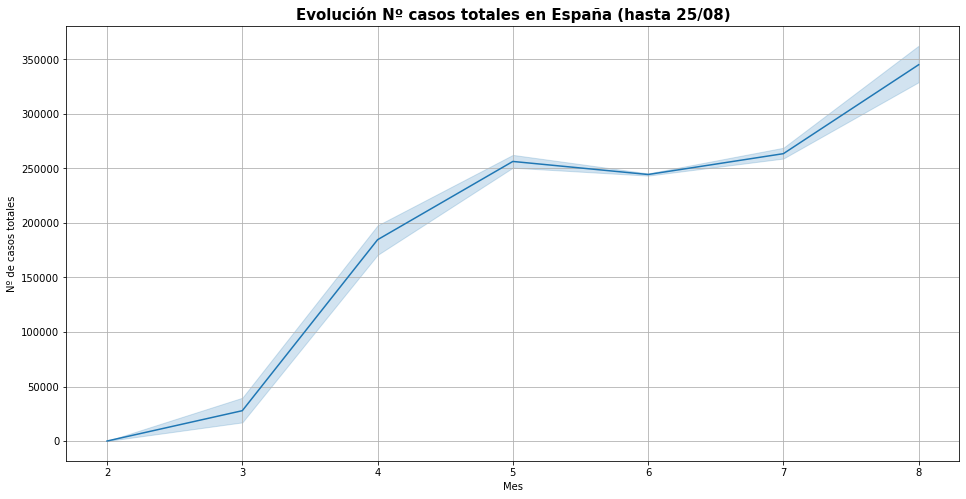

In [27]:

plt.figure(figsize=(16,8))
plt.title('Evolución Nº casos totales en España (hasta 25/08)', fontdict = {'fontweight' : 'bold', 'fontsize' : 15})


sns.lineplot(x = 'Mes', y = 'casos_total', data = nac)


        
plt.grid()
plt.xlabel('Mes')
plt.ylabel('Nº de casos totales')



plt.show()
    

In [28]:
casos_diarios =  casos.groupby(['fecha', 'ccaa', 'mes'])['num_casos'].sum().reset_index()

casos_diarios

,fecha,ccaa,mes,num_casos
0,2020-01-31,Andalucía,1,0
1,2020-01-31,Aragón,1,0
2,2020-01-31,Asturias,1,0
3,2020-01-31,Baleares,1,0
4,2020-01-31,C. Valenciana,1,4
...,...,...,...,...
3776,2020-08-16,Madrid,8,1228
3777,2020-08-16,Melilla,8,1
3778,2020-08-16,Murcia,8,32
3779,2020-08-16,Navarra,8,55


### Task 3: Evolució de Nº de casos diaris

C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num functi

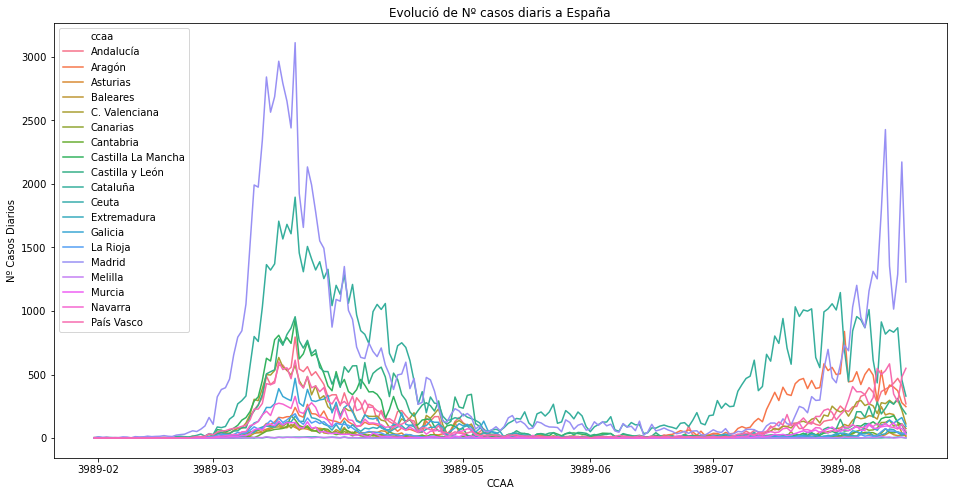

In [29]:

plt.figure(figsize=(16,8))

plt.title('Evolució de Nº casos diaris a España')


sns.lineplot(x = 'fecha', y = 'num_casos', data = casos_diarios, hue = 'ccaa')




plt.ylabel('Nº Casos Diarios')
plt.xlabel('CCAA')
plt.xticks()


plt.show()



### Task 3B: evolució casos diaris a Madrid Vs Cataluña

In [30]:
ca_to_compare = ['Cataluña', 'Madrid']
casos_dia_catmad = casos_diarios.loc[casos_diarios['ccaa'].isin(ca_to_compare)]



C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


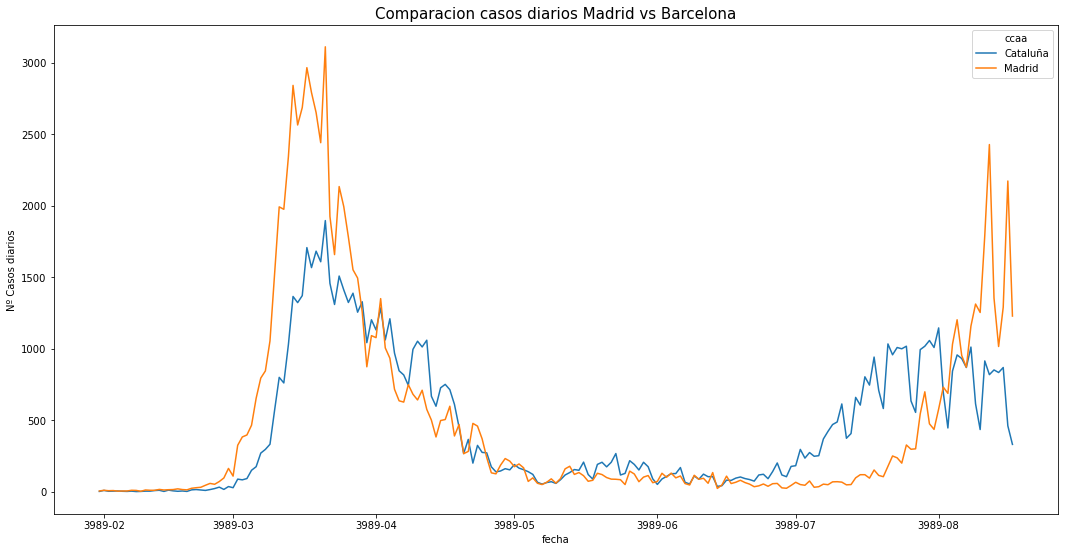

In [31]:
plt.figure(figsize=(18,9))


sns.lineplot(x = 'fecha', y = 'num_casos', data = casos_dia_catmad, hue = 'ccaa')


plt.title('Comparacion casos diarios Madrid vs Barcelona', fontsize = 15)
plt.xlabel('fecha')
plt.ylabel('Nº Casos diarios')

plt.rcParams['date.epoch'] = '0000-12-31'
           
plt.show()

### TASK 4: Proves PCR per CCAA +- x1000hab line

In [114]:
# primer afegirem una nova columna de mes, com amb les anteriors: 

test['mes'] = test['Fecha'].dt.month

test.head()

,Fecha,cod_ine,CCAA,PCR,PCR_x_1000hab.,TEST_ANTICUERPOS,TEST_Acc_x_1000hab,TOTAL_PRUEBAS,Total_Pruebas_x_1000hab.,mes
0,2020-04-23,1,Andalucía,68862,"8,15",82757,"9,8",151619,"17,95",4
1,2020-04-23,2,Aragón,19123,"14,44",3188,"2,41",22311,"16,85",4
2,2020-04-23,3,Asturias,34425,"33,75",9502,"9,32",43927,"43,07",4
3,2020-04-23,4,Illes Balears,27814,"23,21",4407,"3,68",32221,"26,88",4
4,2020-04-23,5,Canarias,45052,"20,29",0,0,45052,"20,29",4


In [33]:
# Driariament es calcula el total a la variable 'España'. No ho vilem, perque embruta les notres dades.   we drop it. 


test_ccaa = test.groupby(['CCAA', 'mes'])['PCR'].sum().reset_index()

test_ccaa = test_ccaa.drop(test_ccaa[test_ccaa['CCAA'] == 'España'].index)


test_ccaa

,CCAA,mes,PCR
0,Andalucía,4,169527
1,Andalucía,5,588713
2,Andalucía,6,955729
3,Andalucía,7,1632133
4,Andalucía,8,1318848
...,...,...,...
95,Región de Murcia,4,39930
96,Región de Murcia,5,124158
97,Región de Murcia,6,200228
98,Región de Murcia,7,377036


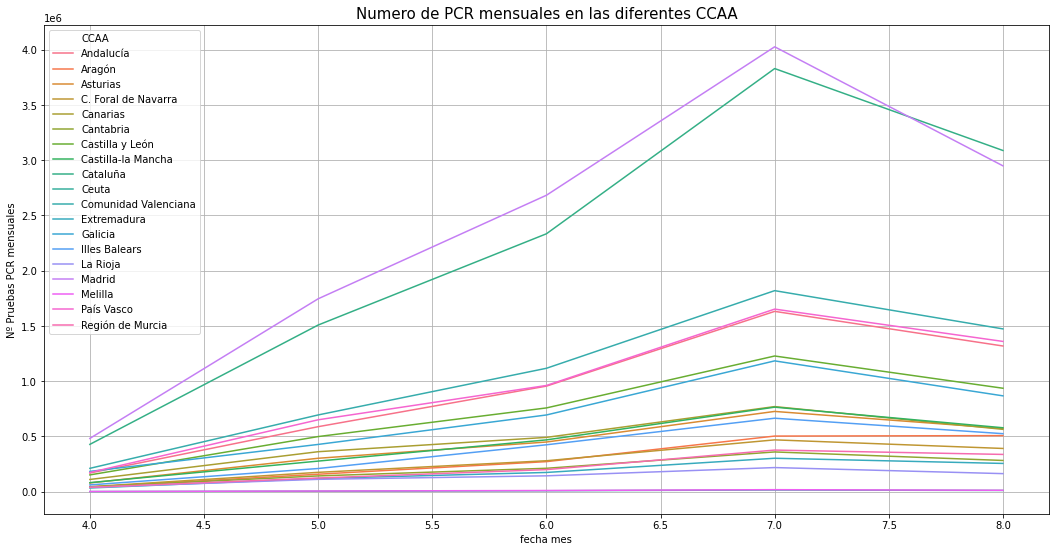

In [44]:
plt.figure(figsize=(18,9))


sns.lineplot(x= 'mes', y= 'PCR', data = test_ccaa, hue = 'CCAA' )

plt.title('Numero de PCR mensuales en las diferentes CCAA', fontsize = 15)
plt.xlabel('fecha mes')
plt.ylabel('Nº Pruebas PCR mensuales')




plt.grid()

plt.show()

### TASK 4B: Nº pruebas anticuerpos por CCAA

In [52]:
# El grafic ens indica una cosa: Madrid i catalunya son les dues comunitats on s'han repartit més els recursos. La seva població 
# es de les mes altes, pero, andalusia x exemple, no esta ni en el top 3. 

# Aixo cambiarà si veiem les probes anticossos que s'han realitzat a les diferents CCAA.

# Les proves AC son mes barates que els PCR, per aquets motiu les CA mes deficitiaries inverteixen en aquestes. 

# Le proves AC tenen un 60% y pcr un 80-90 % de certesa. 

test_ccaa_ac = test.groupby(['CCAA','mes'])['TEST_ANTICUERPOS'].sum().reset_index()

test_ccaa_ac = test_ccaa_ac.drop(test_ccaa_ac[test_ccaa_ac['CCAA'] == 'España'].index)

test_ccaa_ac.head(40)

,CCAA,mes,TEST_ANTICUERPOS
0,Andalucía,4,202223
1,Andalucía,5,630916
2,Andalucía,6,1153036
3,Andalucía,7,1833501
4,Andalucía,8,1151345
5,Aragón,4,10003
6,Aragón,5,88982
7,Aragón,6,151410
8,Aragón,7,196716
9,Aragón,8,118715


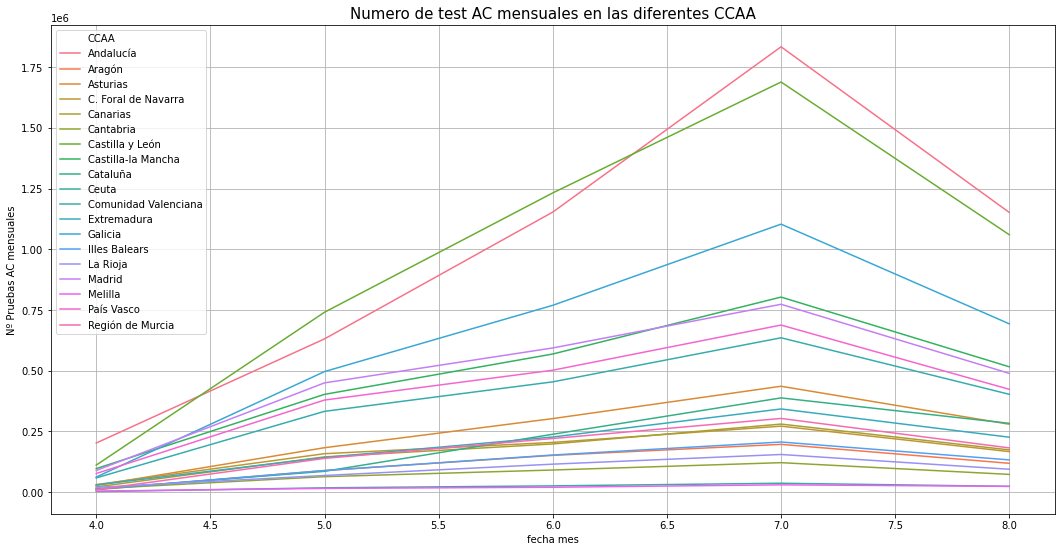

In [51]:
plt.figure(figsize=(18,9))


sns.lineplot(x= 'mes', y= 'TEST_ANTICUERPOS', data = test_ccaa_ac, hue = 'CCAA' )

plt.title('Numero de test AC mensuales en las diferentes CCAA', fontsize = 15)
plt.xlabel('fecha mes')
plt.ylabel('Nº Pruebas AC mensuales')




plt.grid()

plt.show()





#### TASK 4C:  Proves PCR vs Proves AC: 

In [109]:
## Les 3 mes grans son Andalusia, Castilla y leon y Galicia. Posarem en un doble grafic de barres ara, el total de proves x CCAA

test_ccaa_pcr_ac = test.groupby('CCAA')['PCR', 'TEST_ANTICUERPOS'].sum().reset_index()

test_ccaa_pcr_ac = test_ccaa_pcr_ac.drop(test_ccaa_pcr_ac[test_ccaa_pcr_ac['CCAA'] == 'España'].index)

test_ccaa_pcr_ac = test_ccaa_pcr_ac.drop(test_ccaa_pcr_ac[test_ccaa_pcr_ac['CCAA'] == 'Ceuta'].index)
test_ccaa_pcr_ac = test_ccaa_pcr_ac.drop(test_ccaa_pcr_ac[test_ccaa_pcr_ac['CCAA'] == 'Melilla'].index)
test_ccaa_pcr_ac



<ipython-input-109-0b9b46abd37e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_ccaa_pcr_ac = test.groupby('CCAA')['PCR', 'TEST_ANTICUERPOS'].sum().reset_index()


,CCAA,PCR,TEST_ANTICUERPOS
0,Andalucía,4664950,4971021
1,Aragón,1484264,565826
2,Asturias,2131739,1228855
3,C. Foral de Navarra,1363069,832426
4,Canarias,2300648,819214
5,Cantabria,1042875,362805
6,Castilla y León,3575088,4831964
7,Castilla-la Mancha,2173299,2387106
8,Cataluña,11188324,1008071
10,Comunidad Valenciana,5317145,1883597


#### CLEANING MORE DATA: REPLACING ',' for '.' so python reads it as it should be

In [165]:
test.head()

,Fecha,cod_ine,CCAA,PCR,PCR_x_1000hab.,TEST_ANTICUERPOS,TEST_Acc_x_1000hab,TOTAL_PRUEBAS,Total_Pruebas_x_1000hab.,mes
0,2020-04-23,1,Andalucía,68862,"8,15",82757,"9,8",151619,"17,95",4
1,2020-04-23,2,Aragón,19123,"14,44",3188,"2,41",22311,"16,85",4
2,2020-04-23,3,Asturias,34425,"33,75",9502,"9,32",43927,"43,07",4
3,2020-04-23,4,Illes Balears,27814,"23,21",4407,"3,68",32221,"26,88",4
4,2020-04-23,5,Canarias,45052,"20,29",0,0,45052,"20,29",4


In [166]:
## El problema amb els valors de les proves x habitants, es que tenen una , y no un .  Python llegeix com 2 valors separats
## primer hem de reemplaçar aquessta y despres posarem el valor com a numeric: 
# nidea de com es fa

ValueError: could not convert string to float: '17,95'

In [122]:
test_x_hab = test.groupby('CCAA')['Total_Pruebas_x_1000hab.'].mean().reset_index()

test_x_hab

DataError: No numeric types to aggregate

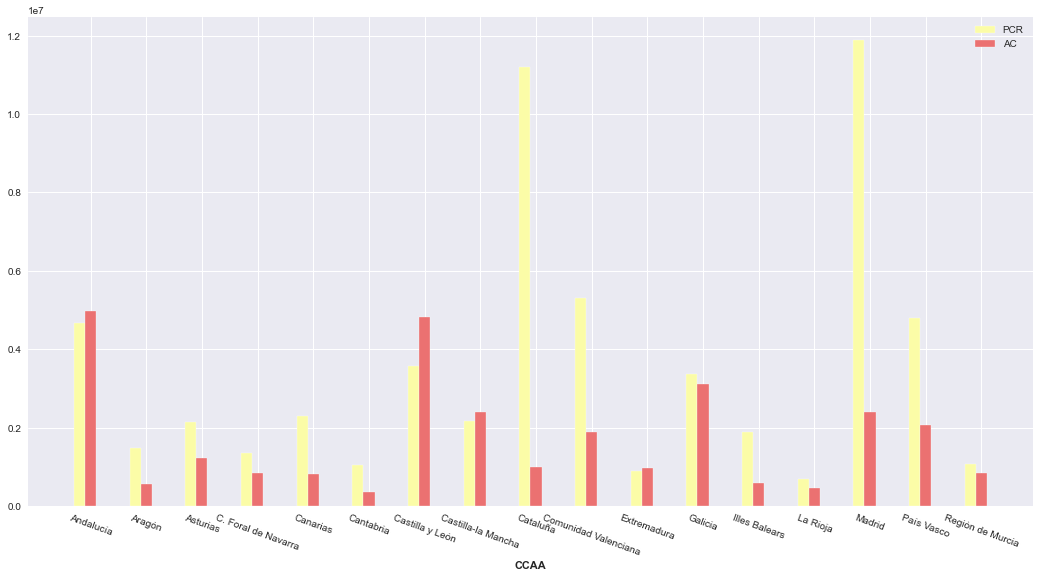

In [115]:
plt.figure(figsize=(18,9))
plt.style.use('seaborn')

# set width of bar
barWidth = 0.2

# set height of bar / data
total_pcr = test_ccaa_pcr_ac['PCR']
total_ac = test_ccaa_pcr_ac['TEST_ANTICUERPOS']


# Set position of bar on X axis
r1 = np.arange(len(total_pcr))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, total_pcr, color='#fbfca7', width=barWidth, edgecolor='white', label= 'PCR')
plt.bar(r2, total_ac, color='#eb7171', width=barWidth, edgecolor='white', label= 'AC')


# Add xticks on the middle of the group bars
plt.xlabel('CCAA', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(total_pcr))],['Andalucía','Aragón','Asturias','C. Foral de Navarra','Canarias','Cantabria','Castilla y León','Castilla-la Mancha',
 'Cataluña','Comunidad Valenciana','Extremadura', 'Galicia','Illes Balears','La Rioja','Madrid','País Vasco','Región de Murcia'], rotation = -20)


 
# Create legend & Show graphic
plt.legend()

plt.show()





In [101]:
test_ccaa_pcr_ac['CCAA']

0                Andalucía
1                   Aragón
2                 Asturias
3      C. Foral de Navarra
4                 Canarias
5                Cantabria
6          Castilla y León
7       Castilla-la Mancha
8                 Cataluña
9                    Ceuta
10    Comunidad Valenciana
12             Extremadura
13                 Galicia
14           Illes Balears
15                La Rioja
16                  Madrid
17                 Melilla
18              País Vasco
19        Región de Murcia
Name: CCAA, dtype: object

In [102]:
CCAA = ['Andalucía','Aragón','Asturias','C. Foral de Navarra','Canarias','Cantabria','Castilla y León','Castilla-la Mancha',
 'Cataluña','Ceuta','Comunidad Valenciana','Extremadura', 'Galicia','Illes Balears','La Rioja','Madrid','Melilla','País Vasco',
 'Región de Murcia']

### TASK 4D: Nº Proves mensuals Madrid-Cataluña

In [37]:
ca_to_compare = ['Cataluña', 'Madrid']

test_ccaa_catmad = test_ccaa.loc[test_ccaa['CCAA'].isin(ca_to_compare)]

test_ccaa_catmad

,CCAA,mes,PCR
40,Cataluña,4,428661
41,Cataluña,5,1508420
42,Cataluña,6,2334177
43,Cataluña,7,3829241
44,Cataluña,8,3087825
80,Madrid,4,482610
81,Madrid,5,1745845
82,Madrid,6,2682813
83,Madrid,7,4026222
84,Madrid,8,2948969


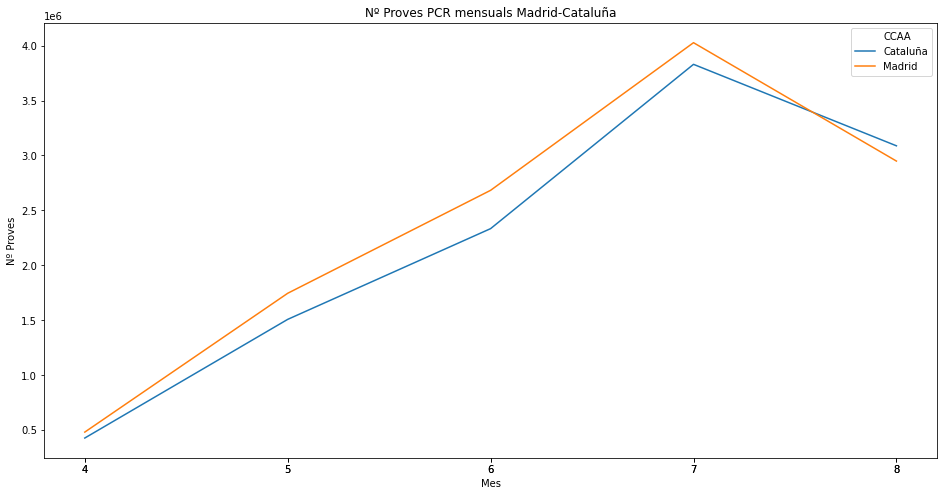

In [41]:

plt.figure(figsize = (16,8))

sns.lineplot(x = 'mes', y = 'PCR', data = test_ccaa_catmad, hue = 'CCAA')

plt.title('Nº Proves PCR mensuals Madrid-Cataluña')

plt.xlabel('Mes')
plt.ylabel('Nº Proves')

plt.xticks(test_ccaa_catmad.mes)
plt.show()



### TASK 5:  Quina CCAA ha realitzat més % de proves segons el seu nombre d'habitants? 

In [42]:
test.head()

,Fecha,cod_ine,CCAA,PCR,PCR_x_1000hab.,TEST_ANTICUERPOS,TEST_Acc_x_1000hab,TOTAL_PRUEBAS,Total_Pruebas_x_1000hab.,mes
0,2020-04-23,1,Andalucía,68862,"8,15",82757,"9,8",151619,"17,95",4
1,2020-04-23,2,Aragón,19123,"14,44",3188,"2,41",22311,"16,85",4
2,2020-04-23,3,Asturias,34425,"33,75",9502,"9,32",43927,"43,07",4
3,2020-04-23,4,Illes Balears,27814,"23,21",4407,"3,68",32221,"26,88",4
4,2020-04-23,5,Canarias,45052,"20,29",0,0,45052,"20,29",4
